In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

C:\Users\dayan\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import keras
keras.__version__

'2.2.4'

In [4]:
np.random.seed(42)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Картинки 28х28, развернем каждую в вектор длины 784.

In [6]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

Масштабируем данные.

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
X_train_scaled[1].mean()

0.03932727

In [10]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [11]:
y_train[:3, :]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
model = Sequential()

In [13]:
model.add(Dense(50, input_dim=784, kernel_initializer='normal', activation='relu'))

In [14]:
model.add(Dense(20, input_dim=50, kernel_initializer='normal', activation='relu'))

In [15]:
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________
None


Визуализация модели (нужно выполнить pip install pydot-ng)

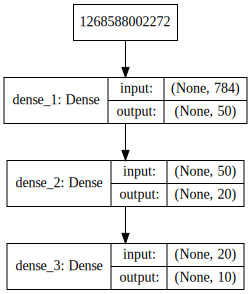

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Callbacks
### Ранняя остановка
Нужно также сказать несколько слов о такой важной особенности Keras, как колбеки. Через них реализовано много полезной функциональности. Например, если вы тренируете сеть в течение очень долгого времени, вам нужно понять, когда пора остановиться, если ошибка на вашем датасете перестала уменьшаться. По-английски описываемая функциональность называется "early stopping" ("ранняя остановка").

In [19]:
from keras.callbacks import EarlyStopping  
early_stopping = EarlyStopping(monitor='loss')

### Tensorboard
Еще в качестве колбека можно использовать сохранение логов в формате, удобном для Tensorboard — это специальная утилита для обработки и визуализации информации из логов Tensorflow.
После того, как обучение закончится (или даже в процессе!), вы можете запустить Tensorboard, указав абсолютный путь к директории с логами:
tensorboard --logdir=/path/to/logs

In [20]:
from keras.callbacks import TensorBoard  
tensorboard = TensorBoard(log_dir='../logs/', write_graph=True)

In [21]:
%%time
model.fit(X_train_scaled, y_train, batch_size=200, epochs=100, 
          validation_split=0.2, callbacks=[early_stopping, tensorboard], verbose=2);

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 1s - loss: 2.2816 - acc: 0.1537 - val_loss: 2.2508 - val_acc: 0.2559
Epoch 2/100
 - 1s - loss: 2.1711 - acc: 0.3058 - val_loss: 2.0261 - val_acc: 0.3411
Epoch 3/100
 - 1s - loss: 1.7798 - acc: 0.4024 - val_loss: 1.4778 - val_acc: 0.5560
Epoch 4/100
 - 1s - loss: 1.2072 - acc: 0.6560 - val_loss: 0.9256 - val_acc: 0.7597
Epoch 5/100
 - 1s - loss: 0.7948 - acc: 0.7842 - val_loss: 0.6469 - val_acc: 0.8314
Epoch 6/100
 - 1s - loss: 0.6005 - acc: 0.8340 - val_loss: 0.5137 - val_acc: 0.8602
Epoch 7/100
 - 1s - loss: 0.4963 - acc: 0.8610 - val_loss: 0.4377 - val_acc: 0.8776
Epoch 8/100
 - 1s - loss: 0.4320 - acc: 0.8777 - val_loss: 0.3904 - val_acc: 0.8891
Epoch 9/100
 - 1s - loss: 0.3891 - acc: 0.8891 - val_loss: 0.3579 - val_acc: 0.8980
Epoch 10/100
 - 1s - loss: 0.3579 - acc: 0.8971 - val_loss: 0.3341 - val_acc: 0.9040
Epoch 11/100
 - 1s - loss: 0.3336 - acc: 0.9038 - val_loss: 0.3148 - val_acc: 0.9071
Epoch 12/100
 - 1s - los

Epoch 97/100
 - 1s - loss: 0.0620 - acc: 0.9834 - val_loss: 0.1472 - val_acc: 0.9606
Epoch 98/100
 - 1s - loss: 0.0613 - acc: 0.9838 - val_loss: 0.1476 - val_acc: 0.9608
Epoch 99/100
 - 1s - loss: 0.0605 - acc: 0.9841 - val_loss: 0.1476 - val_acc: 0.9599
Epoch 100/100
 - 1s - loss: 0.0598 - acc: 0.9840 - val_loss: 0.1475 - val_acc: 0.9609
Wall time: 1min 26s


C помощью Tensorboard удобно отслеживать процесс обучения нейронной сети. 

<img src='../img/tensorboard_mnist.png'>

Оцениваем качество обучения сети на тестовых данных

In [22]:
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Доля верных ответов на тестовых данных: %.2f%%" % (scores[1]*100))

Доля верных ответов на тестовых данных: 96.07%


## Сохраняем сеть
**Архитектуру – в JSON-файл**

In [23]:
model_json = model.to_json()
with open("mnist_model.json", "w") as json_file:
    json_file.write(model_json)

In [24]:
import pprint
import json

In [25]:
with open("mnist_model.json", "r") as json_file:
    pprint.pprint(json.loads(json_file.read()))

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'Dense',
                        'config': {'activation': 'relu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 784],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_constraint': None,
                                   'kernel_initializer': {'class_name': 'RandomNormal',
                                                          'config': {'mean': 0.0,
                                                                     'seed': None,
                                                                  

**Веса сохраняем в бинарный hd5-файл**

In [26]:
model.save_weights("mnist_model.h5")

**Теперь сеть можно восстановить и использовать**

In [27]:
from keras.models import model_from_json

with open("mnist_model.json") as json_file:
    loaded_model_json = json_file.read()

# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights("mnist_model.h5")

Перед использованием модели ее обязательно нужно скомпилировать. 

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [29]:
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Доля верных ответов на тестовых данных: %.2f%%" % (scores[1]*100))

Доля верных ответов на тестовых данных: 96.07%


In [30]:
X_test_scaled[1].size

784

In [31]:
import matplotlib.pyplot as plt, matplotlib.image as mpimg


predicted value:  4


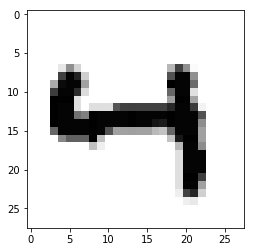

In [105]:
idx = 287
img=X_test[idx].reshape((28,28))
plt.imshow(img,cmap='binary')
print ("predicted value: ", model.predict(x= np.array([X_test_scaled[idx]])).argmax())

In [33]:
model.predict(x= np.array([X_test[1]])).argmax()

2

In [41]:
def addSaltPepperNoise(img, percent):
    img = img.reshape((28, 28))
    row,col = img.shape
    s_vs_p = 0.5
    amount = percent
    out = np.copy(img)
    # Salt mode
    num_salt = np.ceil(amount * img.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img.shape]
    out[coords] = 255

    # Pepper mode
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]
    out[coords] = 0
    out = out.reshape(28*28)
    return out

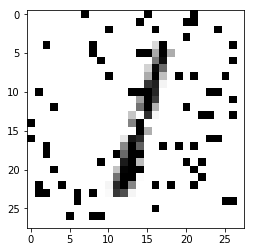

In [43]:
plt.imshow(addSaltPepperNoise(X_test[2], 0.2).reshape(28,28),cmap='binary')

In [40]:
def addGaussianNoise(img, percent):
    img = img.reshape((28,28))
    row,col= img.shape
    mean = 128
    var = 128
    sigma = var**percent
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = img + gauss
    noisy = noisy.reshape(28*28)
    return noisy;

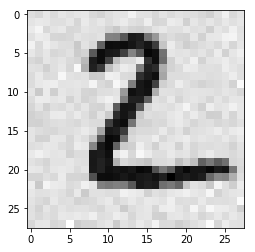

In [106]:
plt.imshow(addGaussianNoise(X_test[1], 0.5).reshape(28,28),cmap='binary')

In [157]:
add_gauss_noise_to_all = lambda images, percent: [addGaussianNoise(img, percent) for img in images]
X_test_noisy_gauss = {i: add_gauss_noise_to_all(X_test, i) for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

In [158]:
add_sp_noise_to_all = lambda images, percent: [addSaltPepperNoise(img, percent) for img in images]
X_test_noisy_sp = {i: add_sp_noise_to_all(X_test, i) for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

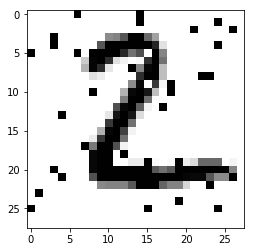

In [159]:
plt.imshow(X_test_noisy_sp[0.1][1].reshape(28,28), cmap='binary')

In [160]:
print ("predicted value: ", model.predict(x= np.array([X_test_noisy_sp[0.1][1]])).argmax())

predicted value:  2


list

In [169]:
X_test_noisy_gauss_np = {key: np.empty_like(X_test_noisy_gauss[0.1]) for key in X_test_noisy_gauss.keys()}

In [170]:
type(X_test_noisy_gauss_np[0.1])

numpy.ndarray

In [172]:
X_test_noisy_gauss_np = {key: np.empty_like(X_test_noisy_gauss[0.1]) for key in X_test_noisy_gauss.keys()}

for key in X_test_noisy_gauss.keys():
    X_test_noisy_gauss_np[key] = np.array(X_test_noisy_gauss[key])

In [178]:
X_test_noisy_sp_np = {key: np.empty_like(X_test_noisy_sp[0.1]) for key in X_test_noisy_sp.keys()}

for key in X_test_noisy_sp.keys():
    X_test_noisy_sp_np[key] = np.array(X_test_noisy_sp[key])

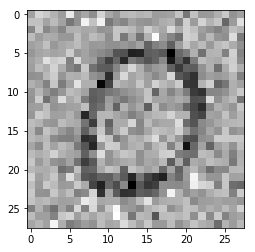

In [173]:
plt.imshow(X_test_noisy_gauss_np[0.9][10].reshape(28,28), cmap='binary')

In [176]:
scores_noise_gauss = {key : model.evaluate(X_test_noisy_gauss_np[key], y_test, verbose=0) for key in X_test_noisy_gauss_np.keys()}

In [141]:
type(X_test_scaled)

numpy.ndarray

In [179]:
scores_noise_sp = {key : model.evaluate(X_test_noisy_sp_np[key], y_test, verbose=0) for key in X_test_noisy_sp_np.keys()}

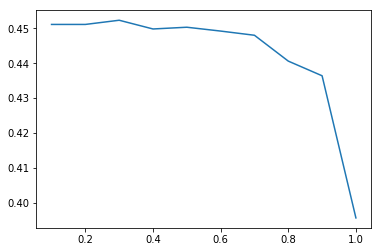

In [177]:
scores_gauss = [scores_noise_gauss[key][1] for key in scores_noise_gauss.keys()]
plt.plot(scores_noise_gauss.keys(), scores_gauss)

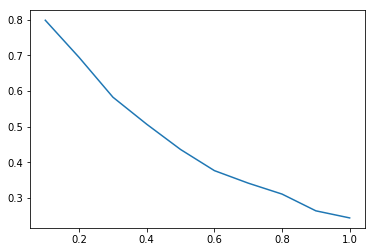

In [181]:
scores_sp = [scores_noise_sp[key][1] for key in scores_noise_sp.keys()]
plt.plot(scores_noise_sp.keys(), scores_sp)